# Word2Vec

### Install Required Libraries

In [1]:
!pip install gensim scikit-learn matplotlib seaborn numpy scipy requests

### Train Word2Vec

In [2]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Define sentences for training
sentences = [
    ['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
    ['this', 'is', 'the', 'second', 'sentence'],
    ['yet', 'another', 'sentence'],
    ['one', 'more', 'sentence'],
    ['and', 'the', 'final', 'sentence']
]

# Train the Word2Vec model
model = Word2Vec(sentences, vector_size=50, window=3, min_count=1, sg=1, epochs=100)

# Check word vectors
print("Vector for 'first':\n", model.wv['first'])

Vector for 'first':
 [-0.00059633 -0.01765504 -0.01724463  0.00560808 -0.01649899 -0.01821386
 -0.00460336 -0.01726614 -0.01424104 -0.01684549 -0.00054371 -0.00915893
  0.01324224  0.00303287 -0.00674599  0.01219832 -0.01197413 -0.00924368
 -0.01453909 -0.00874544 -0.0035922   0.01305431 -0.00542434  0.00987883
  0.01383911 -0.014914    0.00919024  0.01229867 -0.00597549  0.01321732
  0.01227165 -0.01296293 -0.01350085  0.00499634 -0.00330448 -0.01215538
  0.0190802  -0.01031018 -0.01313276 -0.00026225 -0.00539443  0.00090276
 -0.00711888 -0.00088605 -0.00130554  0.00167905  0.01633332 -0.01145962
 -0.00327385  0.01117279]


### PCA plot of word embeddings

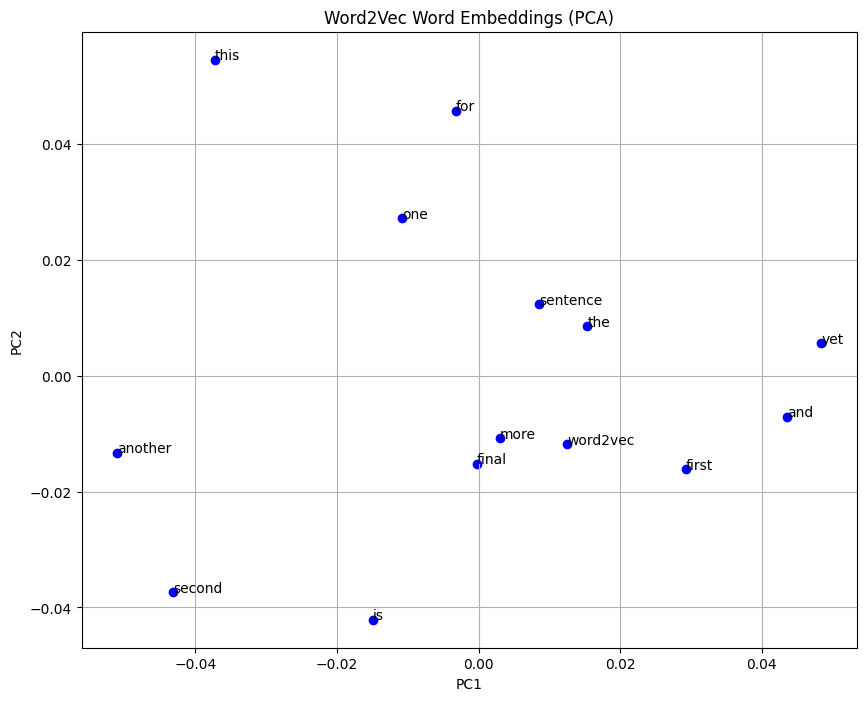

In [3]:
# Extract word vectors
words = list(model.wv.key_to_index.keys())
word_vectors = model.wv[words]

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(word_vectors)

# Plot the words
plt.figure(figsize=(10, 8))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], color='blue')
for i, word in enumerate(words):
    plt.annotate(word, xy=(reduced_vectors[i, 0], reduced_vectors[i, 1]))
plt.title("Word2Vec Word Embeddings (PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()


## Semantic Similarity Evaluation

In [4]:
import requests
url='https://jlu.myweb.cs.uwindsor.ca/8380/'
lines = requests.get(url+'dblp_title.txt').text.split('\n')
sentences=[line.lower().strip().split(' ') for line in lines]
model = Word2Vec(sentences, min_count=3, sg=1, epochs=50)
words = list(model.wv.index_to_key)

In [5]:
data = []
lines=requests.get(url+"ws/WS353-Sim.txt").text.rstrip().split('\n')
for line in lines:
        x, y, sim = line.lower().split()
        data.append(((x, y), sim))
import numpy as np
results = []
count=0
for (x, y), sim in data:
    if (x in words) & (y in words):
        s=model.wv.similarity(x, y)
        results.append((s, sim))
        print(x+"\t"+y+"\t"+str(s)+"\t"+str(sim))

actual, expected = zip(*results)
actual = np.array(actual,dtype=float)
expected = np.array(expected,dtype=float)

from scipy.stats import spearmanr
cor,_= spearmanr(actual, expected)
print(cor)


tiger	cat	0.16942804	7.35
tiger	tiger	1.0	10.00
plane	car	0.236794	5.77
train	car	0.5853148	6.31
television	radio	0.28222275	6.77
media	radio	0.22754961	7.42
bread	butter	0.5397141	6.19
cucumber	potato	0.4198786	5.92
doctor	nurse	0.47295535	7.00
professor	doctor	0.5033882	6.62
student	professor	0.36975873	6.81
smart	stupid	0.3256436	5.81
wood	forest	0.46137542	7.73
money	cash	0.6698912	9.15
king	queen	0.42712614	8.58
king	rook	0.32681832	5.92
football	soccer	0.7677474	9.03
football	basketball	0.8008447	6.81
football	tennis	0.74988127	6.63
physics	chemistry	0.6685371	7.35
vodka	gin	0.22740431	8.46
drink	eat	0.48531583	6.87
car	automobile	0.7233393	8.94
gem	jewel	0.21346179	8.96
journey	voyage	0.4815612	9.29
boy	lad	0.03747399	8.83
coast	shore	0.40529278	9.10
magician	wizard	0.43374255	9.02
furnace	stove	0.45186964	8.79
food	fruit	0.6987858	7.52
bird	crane	0.22329997	7.38
food	rooster	0.30779102	4.42
money	dollar	0.57514477	8.42
money	currency	0.5932445	9.04
tiger	jaguar	0.44054338	8.00


## More STS Datasets

In [12]:
import requests
import numpy as np
from scipy.stats import spearmanr

# Function to calculate similarity using word embeddings
def evaluate_sts(url, model):
    lines = requests.get(url).text.rstrip().split('\n')
    results = []

    for line in lines:
        columns = line.lower().split()

        x, y = columns[0], columns[1]
        sim = columns[2]

        if x in model.wv and y in model.wv:
            s = model.wv.similarity(x, y)
            results.append((s, float(sim)))

    actual, expected = zip(*results)
    actual = np.array(actual, dtype=float)
    expected = np.array(expected, dtype=float)

    cor, _ = spearmanr(actual, expected)
    print(f"Spearman correlation: {cor}")

# URL for the dataset
simlex_url = "https://jlu.myweb.cs.uwindsor.ca/8380/ws/SimLex999.txt"

# Evaluate STS for SimLex-999
print("Evaluating STS for SimLex-999...")
evaluate_sts(simlex_url, model)


Evaluating STS for SimLex-999...
Spearman correlation: 0.1376718594596013


In [14]:
import requests
import numpy as np
from scipy.stats import spearmanr

# Function to calculate similarity using word embeddings
def evaluate_sts(url, model):
    lines = requests.get(url).text.rstrip().split('\n')
    results = []

    for line in lines:
        columns = line.lower().split()
        if len(columns) < 3:
            continue  # Skip if the line does not contain enough columns

        x, y = columns[0], columns[1]
        sim = columns[3]

        if x in model.wv and y in model.wv:
            s = model.wv.similarity(x, y)
            results.append((s, float(sim)))

    actual, expected = zip(*results)
    actual = np.array(actual, dtype=float)
    expected = np.array(expected, dtype=float)

    cor, _ = spearmanr(actual, expected)
    print(f"Spearman correlation: {cor}")

# URL for the dataset
simverb_url = "https://jlu.myweb.cs.uwindsor.ca/8380/ws/SimVerb-3500.txt"

# Evaluate STS for SimVerb-3500
print("Evaluating STS for SimVerb-3500...")
evaluate_sts(simverb_url, model)


Evaluating STS for SimVerb-3500...
Spearman correlation: 0.05041669568570159


## Text Classification Task

In [8]:
# Clone SentEval for datasets
!git clone https://github.com/facebookresearch/SentEval.git
# Download benchmark datasets from SentEval
%cd SentEval/data/downstream
!bash get_transfer_data.bash
%cd ../../../


fatal: destination path 'SentEval' already exists and is not an empty directory.
/content/SentEval/data/downstream
Cloning Moses github repository (for tokenization scripts)...
fatal: destination path 'mosesdecoder' already exists and is not an empty directory.
mkdir: cannot create directory ‘.’: File exists
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3716k  100 3716k    0     0  6274k      0 --:--:-- --:--:-- --:--:-- 6267k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 94916  100 94916    0     0   346k      0 --:--:-- --:--:-- --:--:--  347k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  190k  100  190k    0     0   604k      0 --:--:-- --:

In [9]:
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

dataset_path = "./SentEval/data/downstream/MR"
with open(os.path.join(dataset_path, "rt-polarity.pos"), "r") as f_pos:
    positive_samples = [line.strip() for line in f_pos.readlines()]
with open(os.path.join(dataset_path, "rt-polarity.neg"), "r") as f_neg:
    negative_samples = [line.strip() for line in f_neg.readlines()]

sentences = positive_samples + negative_samples
labels = [1] * len(positive_samples) + [0] * len(negative_samples)

X_train, X_test, y_train, y_test = train_test_split(sentences, labels, test_size=0.2, random_state=42)


### Embedding Aggregation

In [10]:
def aggregate_embeddings(sentences, model):
    embeddings = []
    for sentence in sentences:
        words = sentence.split()
        vectors = [model.wv[word] for word in words if word in model.wv]
        if vectors:
            sentence_vector = np.mean(vectors, axis=0)  # Mean pooling
        else:
            sentence_vector = np.zeros(model.vector_size)  # Handle empty case
        embeddings.append(sentence_vector)
    return np.array(embeddings)

# Aggregate embeddings
X_train_embeddings = aggregate_embeddings(X_train, model)
X_test_embeddings = aggregate_embeddings(X_test, model)


              precision    recall  f1-score   support

           0       0.63      0.67      0.65      1071
           1       0.64      0.60      0.62      1062

    accuracy                           0.63      2133
   macro avg       0.63      0.63      0.63      2133
weighted avg       0.63      0.63      0.63      2133



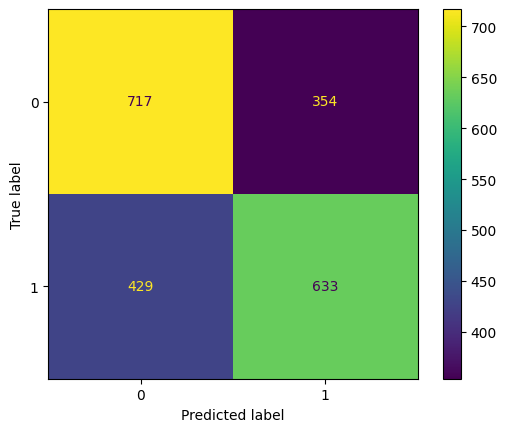

In [11]:
clf = LogisticRegression(max_iter=1000, solver='liblinear')
clf.fit(X_train_embeddings, y_train)
y_pred = clf.predict(X_test_embeddings)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)